In [ ]:
import pandas as pd
import numpy as np
from numpy import genfromtxt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams
import io
from sklearn.svm import SVC
from matplotlib.cm import rainbow
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
from itertools import cycle
from sklearn.model_selection import train_test_split
data = pd.read_csv(io.StringIO(uploaded['heart.csv'].decode('utf-8')))

In [ ]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


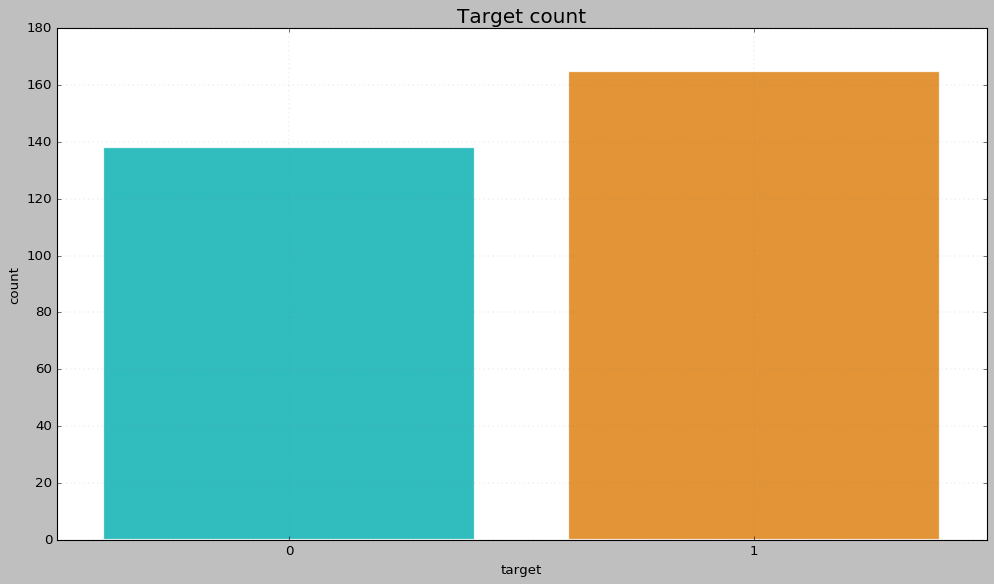

Percentage Haven't Heart Disease: 45.54%
Percentage Have Heart Disease: 54.46%


In [ ]:
import matplotlib.pyplot as plt
colors = ['darkturquoise', 'darkorange']
plt.style.use('classic')
plt.rcParams['figure.figsize']=(15,8)

ax = sns.countplot(x='target', data=data, palette=colors, alpha=0.9, edgecolor=('white'), linewidth=2)
ax.set_ylabel('count', fontsize=12)
ax.set_xlabel('target', fontsize=12)
ax.grid(b=True ,which='major', color='grey', linewidth=0.2)
plt.title('Target count', fontsize=18)
plt.show()

target_0 = len(data[data.target == 0])
target_1 = len(data[data.target == 1])
print("Percentage Haven't Heart Disease: {:.2f}%".format((target_0 / (len(data.target))*100)))
print("Percentage Have Heart Disease: {:.2f}%".format((target_1 / (len(data.target))*100)))

**correlation** **matrix**

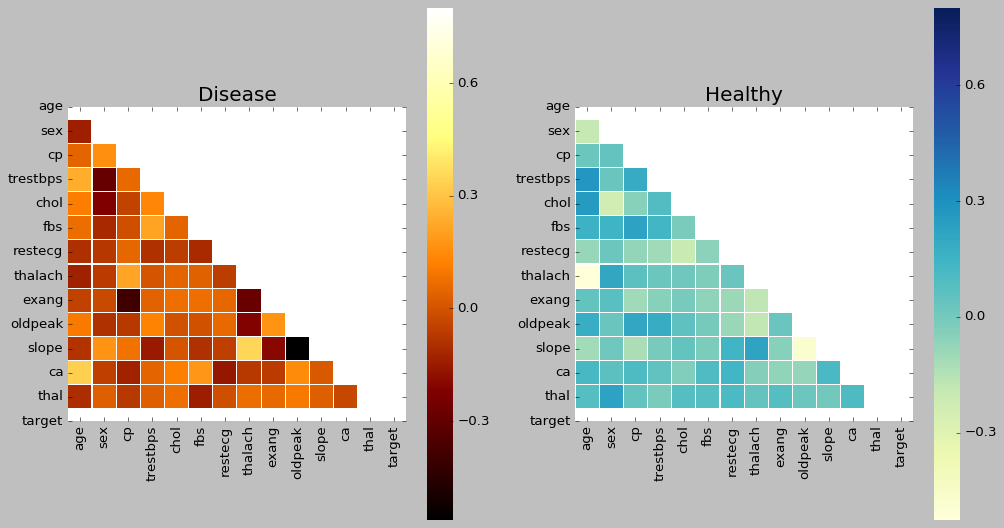

In [ ]:

import seaborn as sns
f, (ax1, ax2) = plt.subplots(1,2,figsize =(15, 8))
corr = data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
heatmapkws = dict(linewidths=0.1)
sns.heatmap((data[data['target'] ==1]).corr(), vmax = .8, square=True, ax = ax2, cmap = 'YlGnBu', mask=mask, **heatmapkws);
ax1.set_title('Disease', fontsize=18)
sns.heatmap((data[data['target'] ==0]).corr(), vmax = .8, square=True, ax = ax1, cmap = 'afmhot', mask=mask,**heatmapkws);
ax2.set_title('Healthy', fontsize=18)
plt.show()

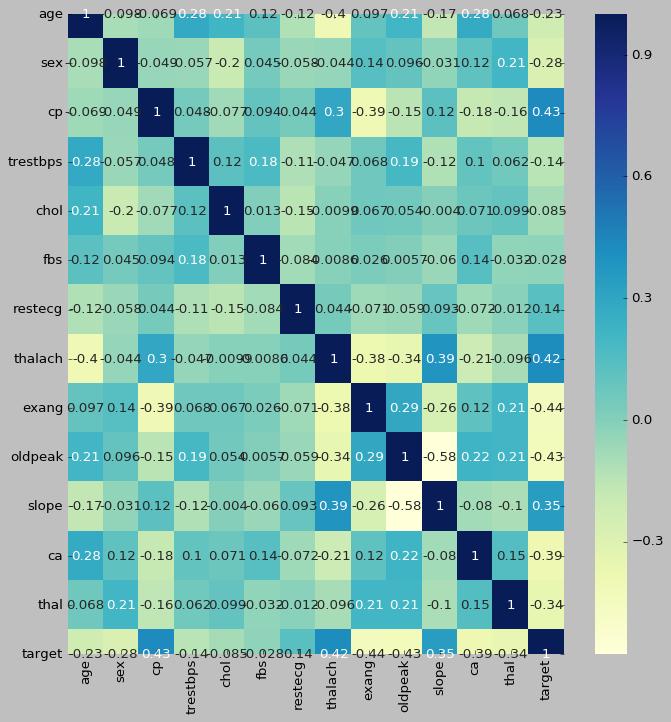

In [ ]:
cormat=data.corr()
top_corr=cormat.index
plt.figure(figsize =(10, 10))
sns.heatmap((data[top_corr]).corr(), annot=True, cmap = 'YlGnBu');

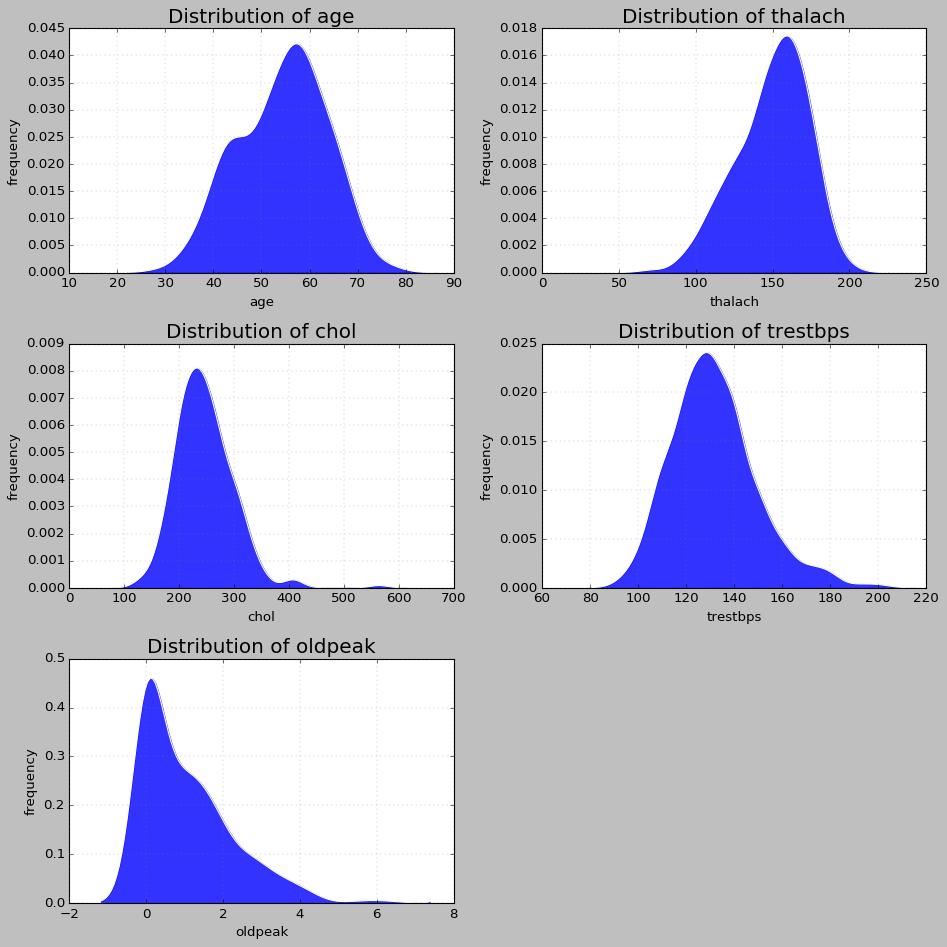

In [ ]:
f,ax=plt.subplots(3,2,figsize=(12,12))
f.delaxes(ax[2,1])

for i,feature in enumerate(['age','thalach','chol','trestbps','oldpeak']):
    sns.distplot(data[feature], ax=ax[i//2,i%2], kde_kws={"color":"white"}, hist=False )
    l1 = ax[i//2,i%2].lines[0]
    x1 = l1.get_xydata()[:,0]
    y1 = l1.get_xydata()[:,1]
    ax[i//2,i%2].fill_between(x1,y1, color="blue", alpha=0.8)

    ax[i//2,i%2].grid(b=True, which='major', color='grey', linewidth=0.3)

    ax[i//2,i%2].set_title('Distribution of {}'.format(feature), fontsize=18)
    ax[i//2,i%2].set_ylabel('count', fontsize=12)
    ax[i//2,i%2].set_xlabel('Modality', fontsize=12)

    ax[i//2,i%2].set_ylabel("frequency", fontsize=12)
    ax[i//2,i%2].set_xlabel(str(feature), fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
dataset = pd.get_dummies(data, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [ ]:
dataset

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,0.478391,-0.101730,-1.165281,-0.724323,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1
299,-1.033002,-1.234996,0.342756,-0.771706,0.138373,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1
300,1.503641,0.706843,-1.029353,-0.378132,2.036303,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
301,0.290464,-0.092738,-2.227533,-1.515125,0.138373,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split
y = dataset['target']
X = dataset.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
Y_pred=classifier.predict(X_test)

In [ ]:
Y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0])

In [ ]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))

In [ ]:
knn_scores

[0.76,
 0.78,
 0.86,
 0.84,
 0.83,
 0.86,
 0.84,
 0.87,
 0.84,
 0.85,
 0.81,
 0.83,
 0.8,
 0.83,
 0.79,
 0.81,
 0.79,
 0.79,
 0.79,
 0.8]

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

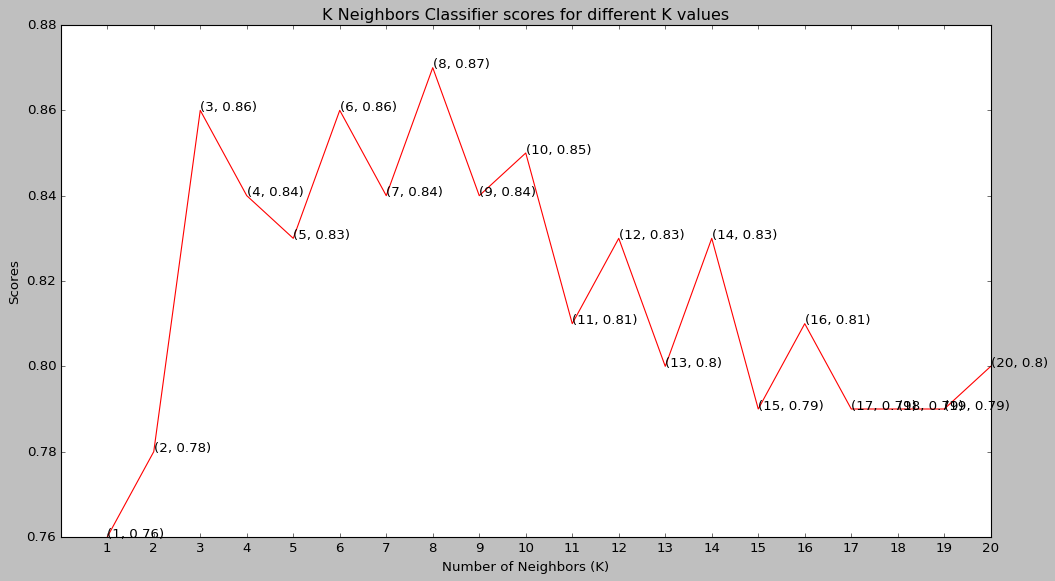

In [ ]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [ ]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_test, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

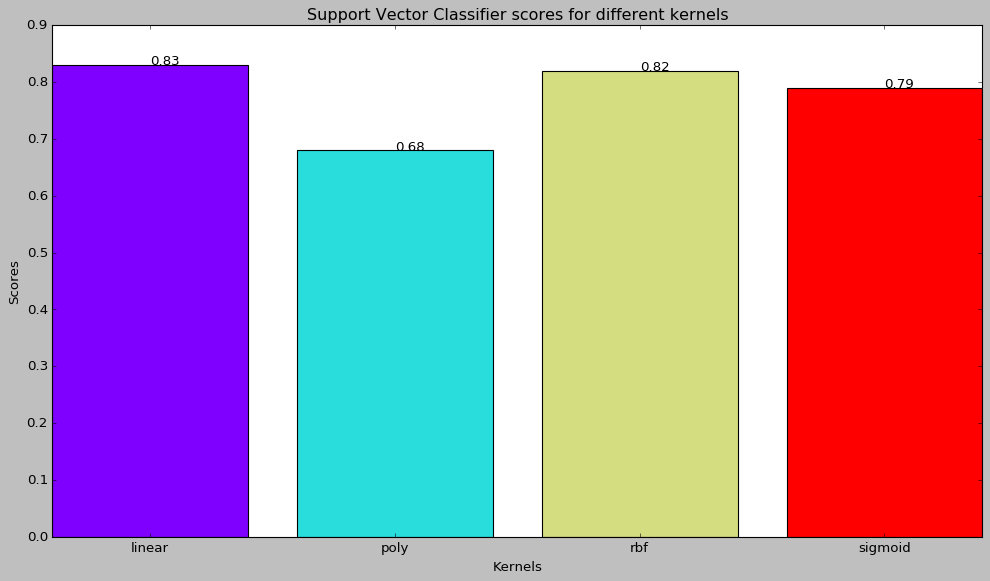

In [ ]:
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix"',
                          cmap = plt.cm.Blues) :
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title, fontsize=12)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label', fontsize=12)
    plt.xlabel('Predicted label', fontsize=12)
    plt.show()

Text(0, 0.5, 'Mean Error')

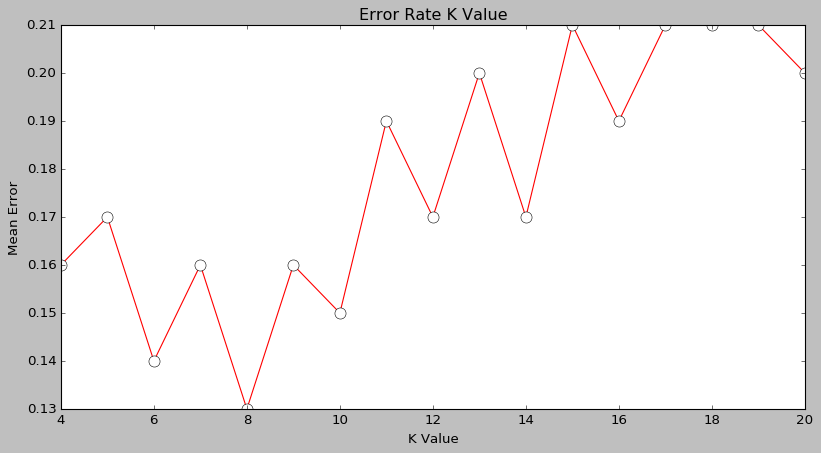

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
error = []

for i in range(4,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))


plt.figure(figsize=(12, 6))
plt.plot(range(4, 21), error, color='red', marker='o',
         markerfacecolor='white', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train, y_train)
    dt_scores.append(dt_classifier.score(X_test, y_test))

In [ ]:
dt_scores

[0.77,
 0.79,
 0.67,
 0.79,
 0.71,
 0.74,
 0.73,
 0.74,
 0.71,
 0.76,
 0.72,
 0.77,
 0.75,
 0.75,
 0.74,
 0.64,
 0.69,
 0.79,
 0.72,
 0.74,
 0.71,
 0.71,
 0.77,
 0.78,
 0.72,
 0.73,
 0.73,
 0.7,
 0.7,
 0.71]

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

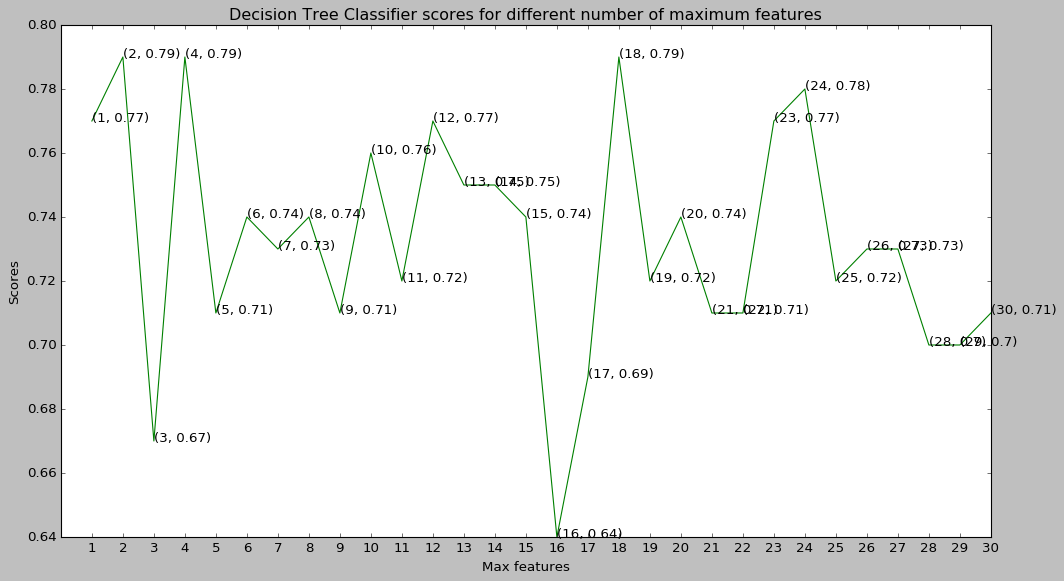

In [ ]:
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

In [ ]:
data.dropna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
from sklearn import svm
svm_clf = svm.SVC(kernel ='linear')

In [ ]:
svm_clf.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [ ]:
y_pred_svm =svm_clf.predict(X_test)

In [ ]:
y_pred_svm

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0])

In [ ]:
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_svm

array([[39,  9],
       [ 8, 44]])

In [ ]:
from sklearn.metrics import accuracy_score
svm_result = accuracy_score(y_test,y_pred_svm)
print("Accuracy :",svm_result)


Accuracy : 0.83


In [ ]:
recall_svm = cm_svm[0][0]/(cm_svm[0][0] + cm_svm[0][1])
precision_svm = cm_svm[0][0]/(cm_svm[0][0]+cm_svm[1][1])
recall_svm,precision_svm

(0.8125, 0.46987951807228917)

In [ ]:
x=data.iloc[:,1:12]
y=data.iloc[:13]

In [ ]:
for index,item in enumerate(y):
  if not(item==0.0):
    y[index]=1
print(y)
target_name=['0','1']

    age  sex  cp  trestbps  chol  fbs  restecg  ...  7  8  9  10  11  12  13
0    63    1   3       145   233    1        0  ...  1  1  1   1   1   1   1
1    37    1   2       130   250    0        1  ...  1  1  1   1   1   1   1
2    41    0   1       130   204    0        0  ...  1  1  1   1   1   1   1
3    56    1   1       120   236    0        1  ...  1  1  1   1   1   1   1
4    57    0   0       120   354    0        1  ...  1  1  1   1   1   1   1
5    57    1   0       140   192    0        1  ...  1  1  1   1   1   1   1
6    56    0   1       140   294    0        0  ...  1  1  1   1   1   1   1
7    44    1   1       120   263    0        1  ...  1  1  1   1   1   1   1
8    52    1   2       172   199    1        1  ...  1  1  1   1   1   1   1
9    57    1   2       150   168    0        1  ...  1  1  1   1   1   1   1
10   54    1   0       140   239    0        1  ...  1  1  1   1   1   1   1
11   48    0   2       130   275    0        1  ...  1  1  1   1   1   1   1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
def plot2D(data,target,target_name):
  colors=cycle('rgbcmykw')
  target_ids=range(len(target_name))
  plt.figure()
  for i,c,label in zip(target_name,colors,target_ids):
    plt.scatter(data[target == i,0],data[target == i,1],c=c,label=label)
    plt.legend()
    plt.savefig('graph')

In [ ]:
modelSVM=LinearSVC(C=0.1)
pca=PCA(n_components=2,whiten=True).fit(x)
X_new=pca.transform(x)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
x = data.iloc[:, 1:2].values
y = data.iloc[:, 2].values

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

regressor.fit(x, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [ ]:
y_pred = regressor.predict(x)

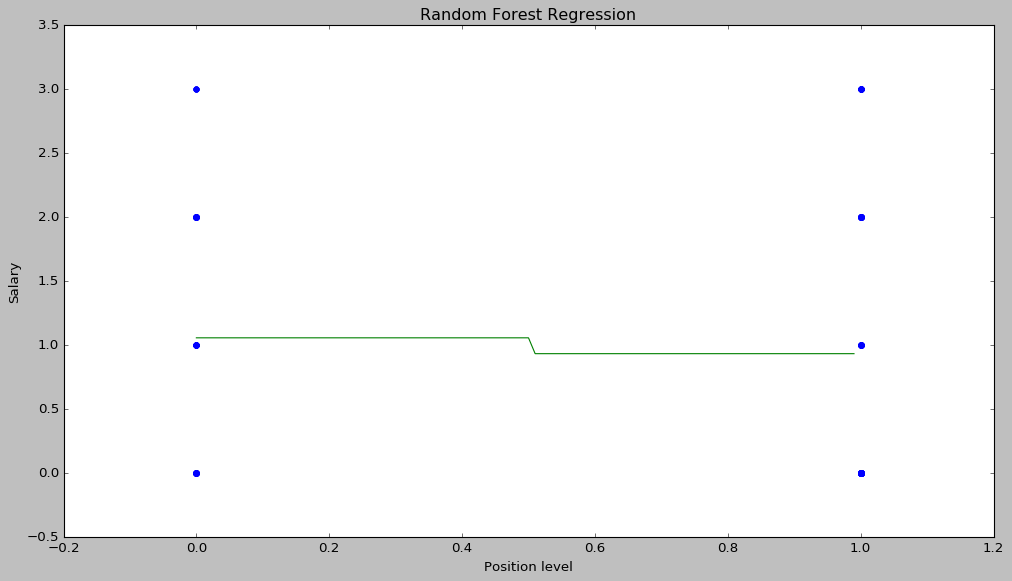

In [ ]:
X_grid = np.arange(min(x), max(x), 0.01)


X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(x, y, color = 'blue')

plt.plot(X_grid, regressor.predict(X_grid),
         color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [ ]:
rf_scores = []
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(X_train, y_train)
    rf_scores.append(rf_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'Random Forest Classifier scores for different number of estimators')

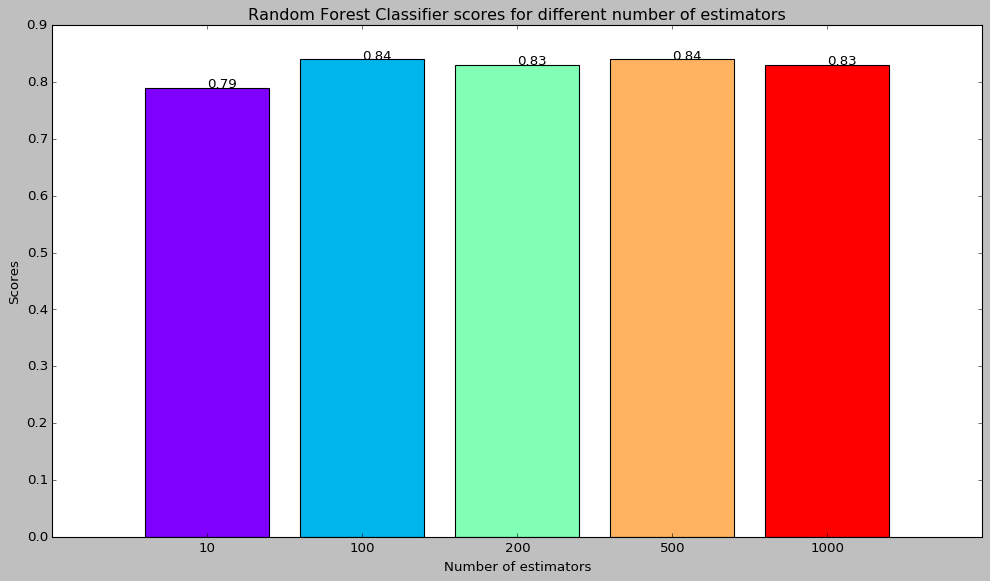

In [ ]:
colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.8)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], rf_scores[i])
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')

In [ ]:
rf_scores

[0.79, 0.84, 0.83, 0.84, 0.83]